## **API Testing** 

In [25]:
import pandas as pd
import requests
import numpy as np 
import matplotlib.pyplot as plt

fitting the model on IBM data 

In [7]:
url = "http://localhost:8008/fit"

json = {
    "ticker":"IBM",
    "use_new_data": True ,
    "n_observations":3000,
    "p":1,
    "q":1

}

response= requests.post(url= url , json=json)
response

<Response [200]>

In [8]:
response.json()

{'ticker': 'IBM',
 'use_new_data': True,
 'n_observations': 3000,
 'p': 1,
 'q': 1,
 'success': True,
 'message': "Trained and saved 'saved_models\\2025-12-09T14-52-37.410610_IBM.pkl'."}

getting the volatility for IBM stocks for upcomming 15 days 

In [10]:
url = "http://localhost:8008/predict"

json ={
    "ticker":"IBM",
    "n_days":15
}

response= requests.post(url=url , json=json)


In [22]:
IBM_result= response.json()
IBM_result

{'ticker': 'IBM',
 'n_days': 15,
 'success': True,
 'forecast': {'2025-12-09T00:00:00': 1.017444155848568,
  '2025-12-10T00:00:00': 1.017675062776767,
  '2025-12-11T00:00:00': 1.017884601503799,
  '2025-12-12T00:00:00': 1.0180748977539589,
  '2025-12-15T00:00:00': 1.0182478400305772,
  '2025-12-16T00:00:00': 1.0184051105327558,
  '2025-12-17T00:00:00': 1.018548211289474,
  '2025-12-18T00:00:00': 1.0186784863771436,
  '2025-12-19T00:00:00': 1.0187971409080259,
  '2025-12-22T00:00:00': 1.0189052573392494,
  '2025-12-23T00:00:00': 1.0190038095452023,
  '2025-12-24T00:00:00': 1.019093675012307,
  '2025-12-25T00:00:00': 1.019175645449116,
  '2025-12-26T00:00:00': 1.0192504360521981,
  '2025-12-29T00:00:00': 1.0193186936263308},
 'message': ''}

plotting the the forcasts result 

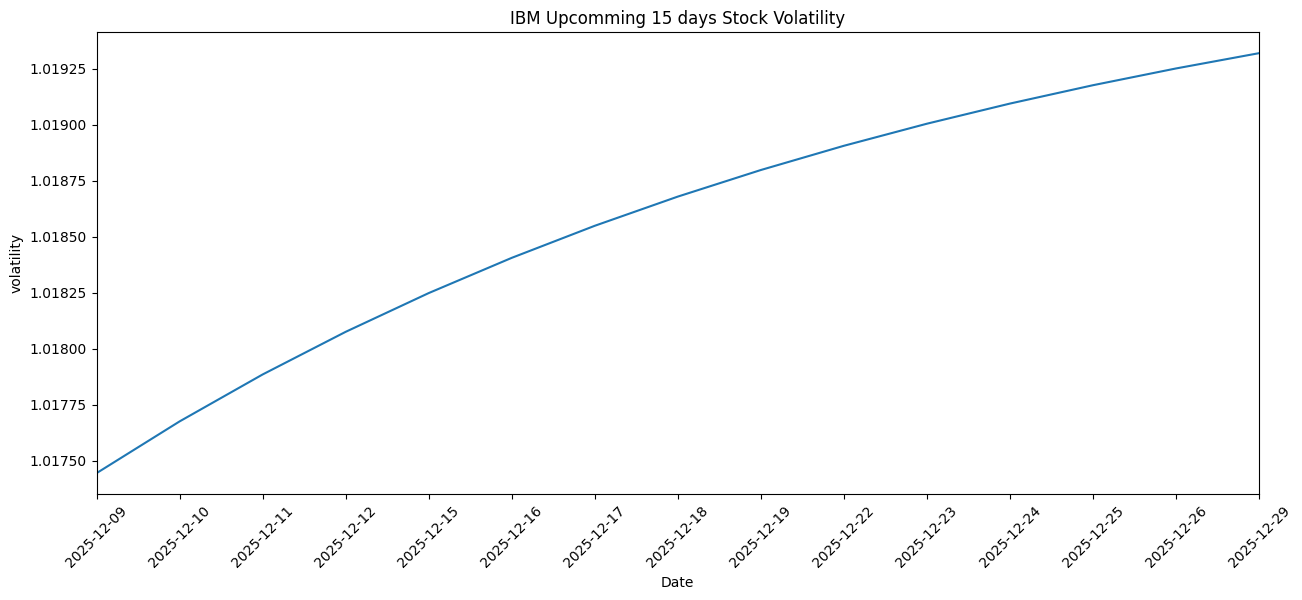

In [30]:
IBM_forecast =pd.Series(IBM_result["forecast"])
IBM_forecast.index = pd.to_datetime(IBM_forecast.index)

fig,ax =plt.subplots(figsize=(15,6))

IBM_forecast.plot(ax=ax )

ax.set_xticks(IBM_forecast.index)
ax.set_xticklabels(IBM_forecast.index.strftime("%Y-%m-%d"), rotation=45)

plt.xlabel("Date")
plt.ylabel("volatility")

plt.title("IBM Upcomming 15 days Stock Volatility");

